In [10]:
# Import Libraries
import matplotlib.pyplot as plt # pang plot
import seaborn as sns #plot din

import pandas as pd #pandas for data
from pandas.core.frame import DataFrame # Linear Algebra
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics #for accuracy

from joblib import dump, load#export to csv
from pathlib import Path

In [11]:
# Loading Dataset of Breast
data = pd.read_csv('BreastCancer.csv')#sinet sa same folder directory para di mahirap HAHAHAHAHA
row, column = data.shape #lagay data row at column
data

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [19]:
#data check 
#missing data check

def dataClean(datas):
    featureList = ['mean_radius', 'mean_texture',	'mean_perimeter',	'mean_area',	'mean_smoothness']
    featureMiss = datas[featureList].isin({0}).sum()/row*100

    print(featureMiss)#pwede i graphg natin para feature lang
dataClean(data)



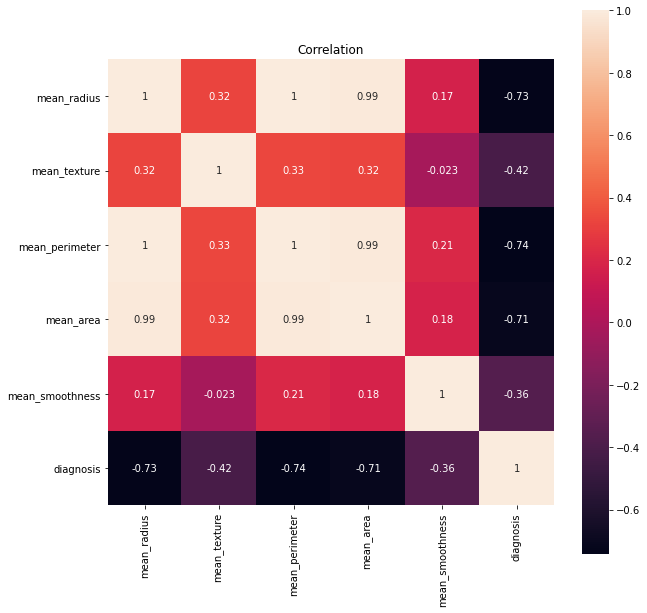

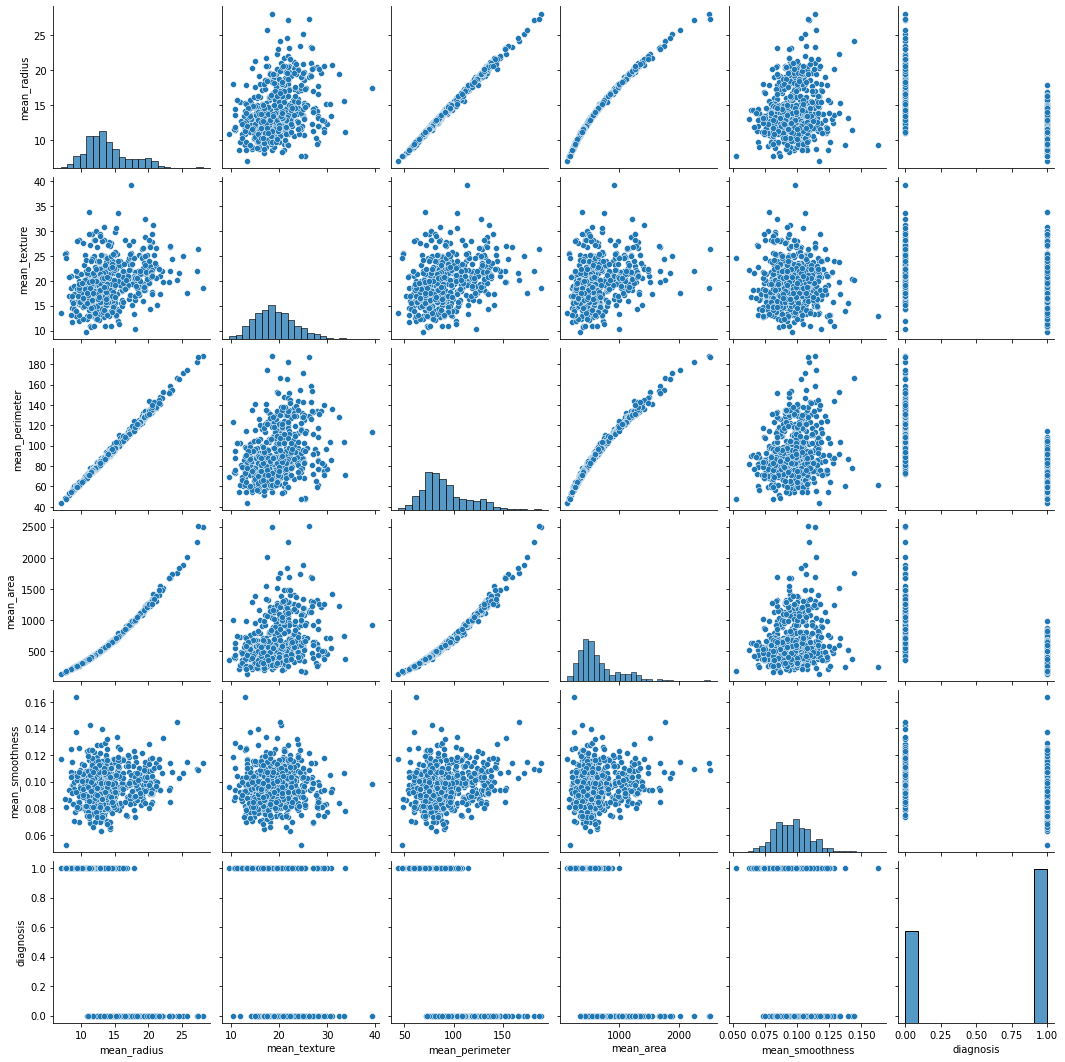

In [13]:
def dataCorr(datas):
    corr = datas.corr()#corelation
    plt.figure(figsize=(10,10))
    plt.title('Correlation')
    sns.heatmap(corr, annot=True, square=True)
    sns.pairplot(data)
dataCorr(data)

In [14]:
def toTrainCSV(X, Y):
    td = pd.concat([X, Y], axis=1)
    trainData = pd.DataFrame(td)
    trainData.to_csv('train.csv')
    print("Train Data exported as csv")
def toTestCSV(X, Y):
    td = pd.concat([X, Y], axis=1)
    testData = pd.DataFrame(td)
    testData.to_csv('test.csv')
    print('Test Data exported as test.csv')

In [15]:

X = data.drop(columns=["diagnosis"])
y = data['diagnosis']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

def dataSave(xtrain, xtest, ytrain, ytest):
    toTrainCSV(xtrain, ytrain)#save lang natin yung piniling train data
    toTestCSV(xtest, ytest)#once lang dapat pag ka pili?

In [16]:
def checkTrain():#check kung may trained data model
    models = Path('logisticRegression.joblib')
    return models

In [17]:
def toPredict(model, xTest, ytest):#predict at show accuracy
    predict = model.predict(xTest)
    acc = metrics.accuracy_score(y_test, predict)
    return print(predict, acc)
    

In [18]:
def selectTrain(models):
    if models.is_file():#if may stored model na load natin at yung ang gamitin
        print('Stored Train Data exists')
        model = load('logisticRegression.joblib')
        toPredict(model, X_test, y_test)
        print("shabu")
    else:
        LogReg = LogisticRegression()
        model = LogReg.fit(X_train, y_train)
        modelLog = dump(model, 'logisticRegression.joblib')#store train data model 
        toPredict(model, X_test, y_test)
        print('Trained Successfully Train Data stored')
selectTrain(checkTrain())

Stored Train Data exists
[1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1
 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0
 1 1 0] 0.9122807017543859
shabu
